---

author: Юрій Клебан

---

# Заміна пропусків у даних (Missing Value Imputation)

Дані реального світу часто мають відсутні значення. Дані можуть мати відсутні значення з ряду причин, таких як спостереження, які не були записані, пошкодження даних, неспівставність форматів даних тощо.

**Проблема**
- [x] Обробка відсутніх даних важлива, оскільки багато алгоритмів машинного навчання або програм для візуалізації та аналізу даних не підтримують дані з відсутніми значеннями.

**Рішення**

- [x] Видалити рядки з відсутніми даними з набору даних.
- [x] Замінити відсутні значення середніми/медіанними значеннями.

**Примітка**

- [x] Використовуйте бізнес-логіку/знання для окремого підходу до кожної змінної(наприклад, вік особи, що брала кредит не варто замінювати на 0)
- [x] У разі малого розміру вибірки або великої частки спостережень із відсутніми значеннями бажано замінювати, а не видаляти

Некоректна інформація в даних може бути записана різними способами, наприклад у датасеті ці дані можуть бутьу визначені як `NA` `<NA>` `NULL` `undefinded` `Undefined`. Перед обробкою таких даних усі невизначені записи варто конвертувати у `NA`.

Щоб переглянути список усіх стовпців, що мають пропуски даних можна скористатися наступним кодом:

In [3]:
library(dplyr)
data <- data <- read.csv("data/cleaned_titled.csv", na.strings = c("<NA>", "NA", "null", "undefined", "NULL", ""))
glimpse(data)

Rows: 13
Columns: 5
$ person_age    <int> 23, 41, 11, 12, 54, 32, 22, 21, 14, 51, 41, 66, 71
$ person_height <int> 185, 175, 142, NA, 191, 168, NA, 165, NA, 250, 20, NA, 1~
$ person_weight <dbl> NA, 68.3, 55.4, 48.2, NA, 78.0, 54.0, NA, 90.2, NA, 81.0~
$ person_gender <chr> "male", "male", "female", "male", "female", "female", "m~
$ empty         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA


## Перевірка наявності пропусків у даних

Пакет **MICE (Multivariate Imputation via Chained Equations)**

,person_age,person_gender,person_height,person_weight,empty,
4,1,1,1,1,0,1
5,1,1,1,0,0,2
4,1,1,0,1,0,2
,0,0,4,5,13,22


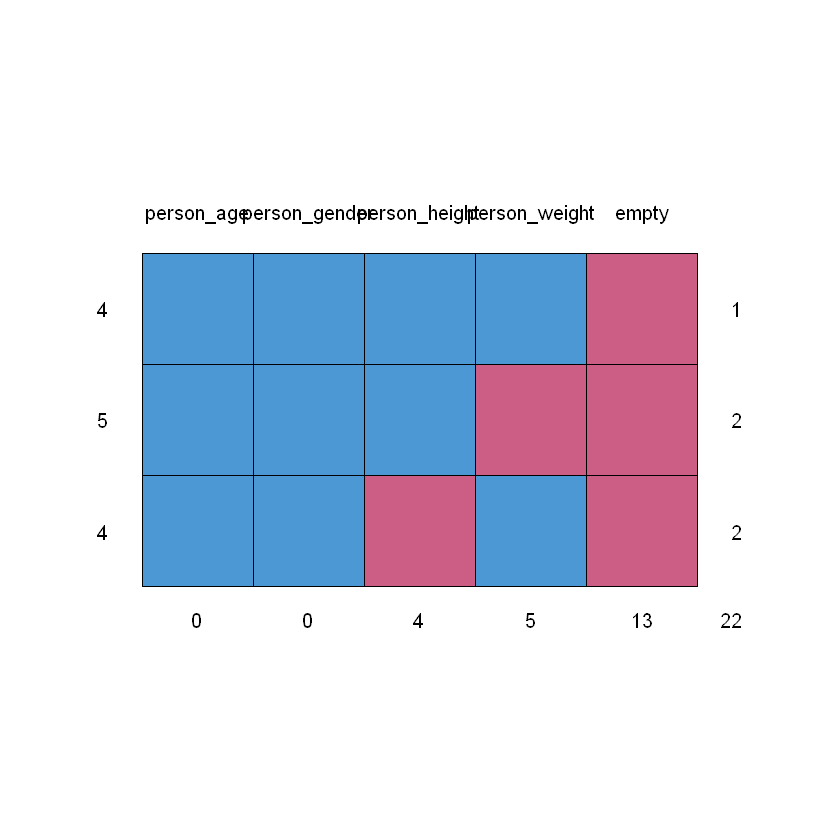

In [7]:
library(mice)
md.pattern(data)

In [10]:
#install.packages("VIM")


 Variables sorted by number of missings: 
      Variable     Count
         empty 1.0000000
 person_weight 0.3846154
 person_height 0.3076923
    person_age 0.0000000
 person_gender 0.0000000



 Missings in variables:
      Variable Count
 person_height     4
 person_weight     5
         empty    13

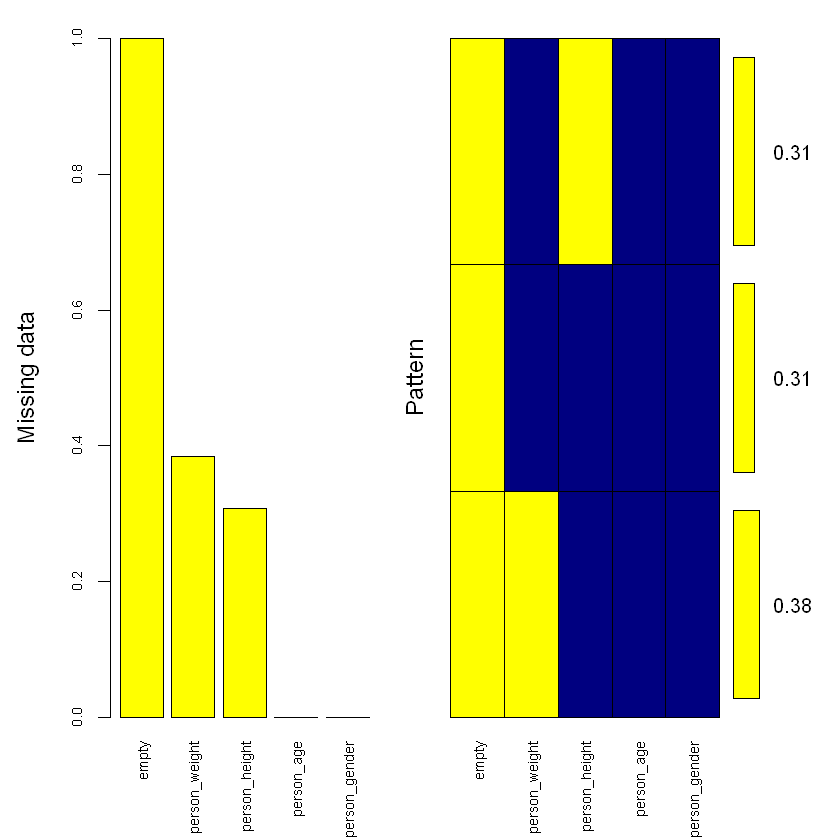

In [13]:
library(VIM)
mice_plot <- aggr(data, 
                  col=c('navyblue','yellow'),
                  numbers=TRUE, 
                  sortVars=TRUE,
                  labels=names(data), 
                  cex.axis=.7,
                  gap=3, 
                  ylab=c("Missing data","Pattern"))
mice_plot

In [15]:
#install.packages("Amalia")

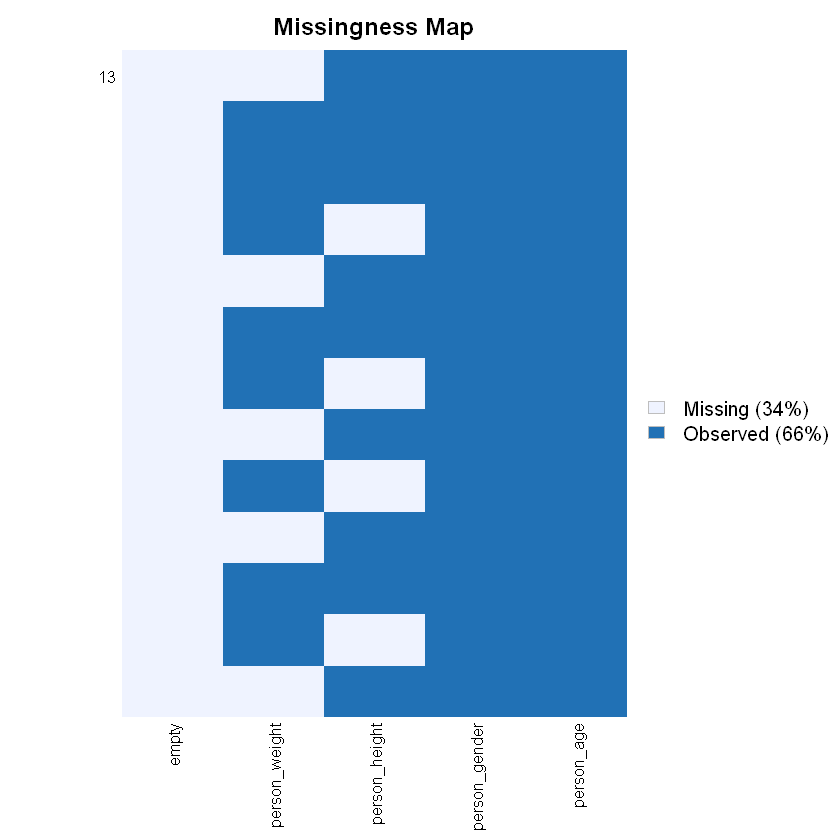

In [17]:
library(Amelia)
Amelia::missmap(data)

Також можна скористатися альтернативними макетами: `missForest`, `mi`.

---

## Видалення пустих рядків та сповпців у `data.frame`

Переглянемо стовпці, що містять пропуски:

In [18]:
# Переглянемо список стовпців з пропусками
colnames(data)[apply(data, 2, anyNA)]

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "person_height" "person_weight" "empty"

Функція `complete.cases` повертає логічні значення

In [19]:
complete.cases(data) # бо є стовпець Empty

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE

Також видаляти стовпці та рядки з `data.frame` можна за допомогою пакету `janitor`.

In [22]:
library(janitor)
data_cleaned <- remove_empty(data, which = c("rows","cols"), quiet = FALSE)
data_cleaned
# Видаляємо повністю пусті

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsNo empty rows to remove.

Removing 1 empty columns of 5 columns total (Removed: empty).



,person_age,person_height,person_weight,person_gender
,<int>,<int>,<dbl>,<chr>
1,23,185,NA,male
2,41,175,68.3,male
3,11,142,55.4,female
4,12,NA,48.2,male
5,54,191,NA,female
6,32,168,78.0,female
7,22,NA,54.0,male
8,21,165,NA,male
9,14,NA,90.2,male


In [23]:
write.csv(data_cleaned, file = "data/cleaned_titled2.csv", row.names = F)

Як бачимо, колонка `empty` була видалена.

Щоб переглянути усі записи, що не мають пропусків скористаємося функцією `na.omit()`:

In [24]:
na.omit(data_cleaned)

,person_age,person_height,person_weight,person_gender
,<int>,<int>,<dbl>,<chr>
2,41,175,68.3,male
3,11,142,55.4,female
6,32,168,78.0,female
11,41,20,81.0,female


Таким чином пропущені значення будуть видалені з датасети, якщо інформацію переприсвоїти `data <- na.omit(data)`

---

## Заміна пропусків у `data.frame`

Існує ряд підходів, що використовуються для заміни пропущених значень у датасеті:

**Заміна на 0**
* Вставте пропущені значення нулем

**Заміна на медіану/середнє значення**
* Для числових змінних - середнє або медіана, мінімум, максимум
* Для категоріальних змінних - мода (бувають випадки, коли моду доцільно використовувати і для числових)

**Сегментна заміна**
* Визначення сегментів
* Обчислення середнього/медіани/моди для сегментів
* Замінити значення по сегментах
* Наприклад, ми можемо сказати, що кількість опадів майже не змінюється для міст у певній області України, у такому випадку ми можемо для усіх міст з пропусками записати значення середнє по регіону.

**Інтелектуальна заміна** (Частковий випадок сегментної заміни)
* Заміна значень з використанням методів машинного навчання

### Заміна пропусків на нуль (0)

In [25]:
data <- read.csv("data/cleaned_titled2.csv")
data

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,NA,male
41,175,68.3,male
11,142,55.4,female
12,NA,48.2,male
54,191,NA,female
32,168,78.0,female
22,NA,54.0,male
21,165,NA,male
14,NA,90.2,male


Замінимо інформацію про вагу з пропусками на `0`:

In [26]:
data_w0 <- data |> 
    mutate(person_weight = ifelse(is.na(person_weight), 0, person_weight))
data_w0

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,0.0,male
41,175,68.3,male
11,142,55.4,female
12,NA,48.2,male
54,191,0.0,female
32,168,78.0,female
22,NA,54.0,male
21,165,0.0,male
14,NA,90.2,male


In [27]:
# Без dplyr
data_w0 <- data
data_w0[is.na(data_w0$person_weight), "person_weight"] <- 0
data_w0

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,0.0,male
41,175,68.3,male
11,142,55.4,female
12,NA,48.2,male
54,191,0.0,female
32,168,78.0,female
22,NA,54.0,male
21,165,0.0,male
14,NA,90.2,male


Зробити заміну для усіх числових стовпців:

In [28]:
library(tidyr) # for replace_na()
data_all <- data |> 
    mutate_if(is.numeric , replace_na, replace = 0)
data_all

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,0.0,male
41,175,68.3,male
11,142,55.4,female
12,0,48.2,male
54,191,0.0,female
32,168,78.0,female
22,0,54.0,male
21,165,0.0,male
14,0,90.2,male


---

## Числова заміна пропусків

Заміна на константи або обчислені значення є стандарним підходом. Так, наприклад, заміна певного значення на середнє матиме вигляд:

In [29]:
data_m <- data |> 
    mutate(person_weight = ifelse(is.na(person_weight), mean(data$person_weight, na.rm = T), person_weight))
data_m

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,66.7625,male
41,175,68.3000,male
11,142,55.4000,female
12,NA,48.2000,male
54,191,66.7625,female
32,168,78.0000,female
22,NA,54.0000,male
21,165,66.7625,male
14,NA,90.2000,male


Заміна на min, max, median не відрізняється.

Якщо виникає потреба замінити, наприклад, усі значення на медіану у всіх стовпцях за один прохід можна скористатися функцією `mutate_if()`:

In [30]:
data_all <- data |> 
    mutate_if(is.numeric, function(x) ifelse(is.na(x), median(x, na.rm = T), x))
data_all

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,63.65,male
41,175,68.30,male
11,142,55.40,female
12,171,48.20,male
54,191,63.65,female
32,168,78.00,female
22,171,54.00,male
21,165,63.65,male
14,171,90.20,male


Розглянемо кілька бібліотек для перевірки даних на наявність пропусків...

Ще одним із варіантів заміни значень може бути використання бібліотеки `Hmisc`:

In [35]:
#install.packages("Hmisc")

In [37]:
library(Hmisc)
data_wm <- data |> 
    mutate(person_weight = impute(data$person_weight, fun = mean)) # mean imputation
# Аналогічно можна замінити на min,max, median чи інші функції
data_wm 
# * Значення із * - замінені

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

person_age,person_height,person_weight,person_gender
<int>,<int>,<impute>,<chr>
23,185,66.7625,male
41,175,68.3000,male
11,142,55.4000,female
12,NA,48.2000,male
54,191,66.7625,female
32,168,78.0000,female
22,NA,54.0000,male
21,165,66.7625,male
14,NA,90.2000,male


---

#### Hot deck imputation (як перекласти???)

Метод `Hot deck imputation` передбачає, що пропущені значення обчислюються шляхом копіювання значень із подібних записів у тому ж наборі даних.

Основне питання при `Hot deck imputation` полягає в тому, як вибрати значення заміни. Одним із поширених підходів є випадковий відбір:

In [40]:
# set.seed(1)
data_hot <- data |> 
    mutate(person_weight = impute(data$person_weight, "random")) 
data_hot 

person_age,person_height,person_weight,person_gender
<int>,<int>,<impute>,<chr>
23,185,59.0,male
41,175,68.3,male
11,142,55.4,female
12,NA,48.2,male
54,191,55.4,female
32,168,78.0,female
22,NA,54.0,male
21,165,54.0,male
14,NA,90.2,male


Вихідне значення залежить від значення `seed`.

---

## Сегментна заміна пропусків

Заміна по сегментах часто дозволяє будувати точніші математичні моделі, адже групові середні краще описують явища і процеси, ніж загальні для всієї вибірки.

Знайдемо середні значення ваги за статтю та використаємо ці значення для заміни пропусків у даних.

In [41]:
data_sgm <- data |> 
                group_by(person_gender) |>
                mutate(person_weight = replace_na(person_weight, mean(person_weight, na.rm = TRUE)))
data_sgm

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,63.94000,male
41,175,68.30000,male
11,142,55.40000,female
12,NA,48.20000,male
54,191,71.46667,female
32,168,78.00000,female
22,NA,54.00000,male
21,165,63.94000,male
14,NA,90.20000,male


Також можна здійснити заміну значень по усіх стовпцях датасету за один раз. Проте не варто такий підхід використовувати постійно, а враховувати бізнес-логіку процесів, що вивчаються.

In [42]:
data_sgm2 <- data %>% 
  group_by(person_gender) %>% 
    mutate(
      across(everything(), ~replace_na(.x, min(.x, na.rm = TRUE)))
    )
data_sgm2

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,48.2,male
41,175,68.3,male
11,142,55.4,female
12,165,48.2,male
54,191,55.4,female
32,168,78.0,female
22,165,54.0,male
21,165,48.2,male
14,165,90.2,male


Якщо ж є потреба замінювати по окремих стовпцях, то їх можна вказати замість `everything()`: `across(c("person_height", "person_weight"), ~replace_na(.x, min(.x, na.rm = TRUE)))`.

Іншим варіантом може бути вказання номерів колонок: `across(c(1,3), ~replace_na(.x, min(.x, na.rm = TRUE)))`

---

## Інтелектуальні методи заміни

Теоретично інтелектуальні методи заміни пропусків є найкращими, адже враховують математичні залежності у даних.

https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4

In [44]:
library(VIM)
data_knn <- kNN(data)
data_knn

person_age,person_height,person_weight,person_gender,person_age_imp,person_height_imp,person_weight_imp,person_gender_imp
<int>,<int>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
23,185,59.0,male,FALSE,FALSE,TRUE,FALSE
41,175,68.3,male,FALSE,FALSE,FALSE,FALSE
11,142,55.4,female,FALSE,FALSE,FALSE,FALSE
12,168,48.2,male,FALSE,TRUE,FALSE,FALSE
54,191,68.3,female,FALSE,FALSE,TRUE,FALSE
32,168,78.0,female,FALSE,FALSE,FALSE,FALSE
22,168,54.0,male,FALSE,TRUE,FALSE,FALSE
21,165,59.0,male,FALSE,FALSE,TRUE,FALSE
14,168,90.2,male,FALSE,TRUE,FALSE,FALSE


Ще одним схожим методом заміни пропусків може бути здійснення прогнозів на основі регресії чи складніших математичних методів пропусків.

---

## Набори даних

1. https://github.com/kleban/r-book-published/tree/main/datasets/untitled.csv
2. https://github.com/kleban/r-book-published/tree/main/datasets/badtitled.csv
3. https://github.com/kleban/r-book-published/tree/main/datasets/cleaned_titled.csv
4. https://github.com/kleban/r-book-published/tree/main/datasets/cleaned_titled2.csv
5. https://github.com/kleban/r-book-published/tree/main/datasets/river_eco.csv

---

## Використані та додаткові джерела

1. [KPMG Virtual Internship](https://www.insidesherpa.com/virtual-internships/m7W4GMqeT3bh9Nb2c)
2. [An introduction to data cleaning with R / Edwin de Jonge, Mark van der Loo, 2013](https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf)
3. [Anomaly Detection in R](datacamp.com/courses/anomaly-detection-in-r)
4. [K-nearest Neighbor: The maths behind it, how it works and an example](https://medium.com/analytics-vidhya/k-nearest-neighbor-the-maths-behind-it-how-it-works-and-an-example-f1de1208546c)
5. [Quantile. Wikipedia](https://en.wikipedia.org/wiki/Quantile)